**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.6244 - accuracy: 0.8126 - val_loss: 0.2483 - val_accuracy: 0.9283
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2487 - accuracy: 0.9229 - val_loss: 0.1796 - val_accuracy: 0.9457
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1611 - accuracy: 0.9505 - val_loss: 0.1448 - val_accuracy: 0.9582
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1148 - accuracy: 0.9634 - val_loss: 0.1450 - val_accuracy: 0.9587
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0847 - accuracy: 0.9737 - val_loss: 0.1381 - val_accuracy: 0.9603
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0632 - accuracy: 0.9800 - val_loss: 0.1288 - val_accuracy: 0.9657
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0468 - accuracy: 0.9849 - val_loss: 0.1414 - val_accuracy: 0.9581

**Plotting a validation accuracy comparison**

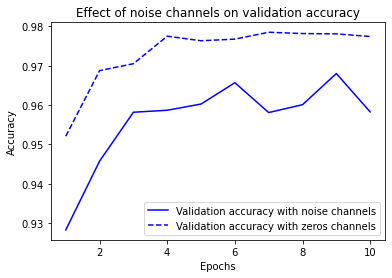

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 2.3171 - accuracy: 0.1055 - val_loss: 2.3066 - val_accuracy: 0.1009
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 2.3008 - accuracy: 0.1162 - val_loss: 2.3097 - val_accuracy: 0.1066
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 2.2907 - accuracy: 0.1312 - val_loss: 2.3222 - val_accuracy: 0.1056
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 2.2766 - accuracy: 0.1431 - val_loss: 2.3257 - val_accuracy: 0.1032
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 2.2594 - accuracy: 0.1542 - val_loss: 2.3368 - val_accuracy: 0.1014
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 2.2382 - accuracy: 0.1693 - val_loss: 2.3486 - val_accuracy: 0.1023
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 2.2137 - accuracy: 0.1836 - val_loss: 2.3632 - val_accuracy: 0.1038
Epoch 

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 943.9146 - accuracy: 0.3984 - val_loss: 2.6531 - val_accuracy: 0.2872
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 6.3962 - accuracy: 0.2640 - val_loss: 2.3659 - val_accuracy: 0.2904
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 3.0407 - accuracy: 0.2922 - val_loss: 2.4058 - val_accuracy: 0.3100
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.6992 - accuracy: 0.2715 - val_loss: 2.3342 - val_accuracy: 0.2978
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 2.5420 - accuracy: 0.2889 - val_loss: 2.4927 - val_accuracy: 0.2677
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.5461 - accuracy: 0.2720 - val_loss: 2.0202 - val_accuracy: 0.2598
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 2.5318 - accuracy: 0.2920 - val_loss: 2.3385 - val_accuracy: 0.2948
Epoc

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3605 - accuracy: 0.9131 - val_loss: 0.1685 - val_accuracy: 0.9543
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1433 - accuracy: 0.9641 - val_loss: 0.1613 - val_accuracy: 0.9643
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1233 - accuracy: 0.9720 - val_loss: 0.1808 - val_accuracy: 0.9644
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1004 - accuracy: 0.9782 - val_loss: 0.1982 - val_accuracy: 0.9692
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0906 - accuracy: 0.9807 - val_loss: 0.2427 - val_accuracy: 0.9676
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0813 - accuracy: 0.9841 - val_loss: 0.2276 - val_accuracy: 0.9708
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0758 - accuracy: 0.9861 - val_loss: 0.2101 - val_accuracy: 0.9741
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6636 - accuracy: 0.8331 - val_loss: 0.3588 - val_accuracy: 0.9003
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3506 - accuracy: 0.9033 - val_loss: 0.3063 - val_accuracy: 0.9157
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3153 - accuracy: 0.9122 - val_loss: 0.2914 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2993 - accuracy: 0.9161 - val_loss: 0.2817 - val_accuracy: 0.9214
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2899 - accuracy: 0.9185 - val_loss: 0.2763 - val_accuracy: 0.9233
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2830 - accuracy: 0.9210 - val_loss: 0.2715 - val_accuracy: 0.9247
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2785 - accuracy: 0.9218 - val_loss: 0.2694 - val_accuracy: 0.9262
Epoch 

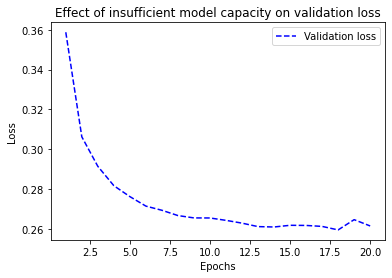

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3578 - accuracy: 0.8996 - val_loss: 0.1855 - val_accuracy: 0.9466
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1617 - accuracy: 0.9522 - val_loss: 0.1406 - val_accuracy: 0.9573
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1120 - accuracy: 0.9662 - val_loss: 0.1123 - val_accuracy: 0.9659
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0856 - accuracy: 0.9749 - val_loss: 0.1004 - val_accuracy: 0.9703
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0695 - accuracy: 0.9790 - val_loss: 0.1025 - val_accuracy: 0.9699
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0574 - accuracy: 0.9825 - val_loss: 0.0957 - val_accuracy: 0.9721
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9849 - val_loss: 0.0980 - val_accuracy: 0.9738
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 29ms/step - loss: 0.5031 - accuracy: 0.7996 - val_loss: 0.4029 - val_accuracy: 0.8471
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3054 - accuracy: 0.9035 - val_loss: 0.3048 - val_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2240 - accuracy: 0.9297 - val_loss: 0.2829 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1776 - accuracy: 0.9446 - val_loss: 0.2752 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1476 - accuracy: 0.9529 - val_loss: 0.2953 - val_accuracy: 0.8829
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1183 - accuracy: 0.9660 - val_loss: 0.3037 - val_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1020 - accuracy: 0.9685 - val_loss: 0.3653 - val_accuracy: 0.8686
Epoch 8/20
30

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 28ms/step - loss: 0.6102 - accuracy: 0.7641 - val_loss: 0.5370 - val_accuracy: 0.8270
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4749 - accuracy: 0.8699 - val_loss: 0.4434 - val_accuracy: 0.8618
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3819 - accuracy: 0.8917 - val_loss: 0.3755 - val_accuracy: 0.8764
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3147 - accuracy: 0.9084 - val_loss: 0.3366 - val_accuracy: 0.8802
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2671 - accuracy: 0.9201 - val_loss: 0.3062 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2313 - accuracy: 0.9309 - val_loss: 0.2910 - val_accuracy: 0.8889
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2034 - accuracy: 0.9373 - val_loss: 0.2792 - val_accuracy: 0.8911
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 117ms/step - loss: 0.5564 - accuracy: 0.7483 - val_loss: 0.3114 - val_accuracy: 0.8836
Epoch 2/20
30/30 [==============================] - 4s 119ms/step - loss: 0.2657 - accuracy: 0.8959 - val_loss: 0.4291 - val_accuracy: 0.8074
Epoch 3/20
30/30 [==============================] - 3s 107ms/step - loss: 0.1634 - accuracy: 0.9369 - val_loss: 0.2785 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 3s 88ms/step - loss: 0.0877 - accuracy: 0.9705 - val_loss: 0.3430 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 2s 82ms/step - loss: 0.0767 - accuracy: 0.9776 - val_loss: 0.3536 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 3s 84ms/step - loss: 0.0048 - accuracy: 0.9995 - val_loss: 0.5765 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 3s 100ms/step - loss: 8.5683e-04 - accuracy: 0.9999 - val_loss: 0.6411 - val_accuracy: 0.8859
Epoch

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 26ms/step - loss: 0.6417 - accuracy: 0.7253 - val_loss: 0.5521 - val_accuracy: 0.7741
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4653 - accuracy: 0.8842 - val_loss: 0.4320 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3759 - accuracy: 0.9085 - val_loss: 0.3985 - val_accuracy: 0.8760
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3334 - accuracy: 0.9188 - val_loss: 0.4109 - val_accuracy: 0.8667
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3088 - accuracy: 0.9243 - val_loss: 0.3671 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2893 - accuracy: 0.9310 - val_loss: 0.3635 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2785 - accuracy: 0.9355 - val_loss: 0.3816 - val_accuracy: 0.8788
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6347 - accuracy: 0.6237 - val_loss: 0.5352 - val_accuracy: 0.8274
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5131 - accuracy: 0.7608 - val_loss: 0.4151 - val_accuracy: 0.8746
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4278 - accuracy: 0.8251 - val_loss: 0.3452 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3664 - accuracy: 0.8646 - val_loss: 0.3281 - val_accuracy: 0.8766
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3120 - accuracy: 0.8918 - val_loss: 0.2845 - val_accuracy: 0.8905
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2679 - accuracy: 0.9087 - val_loss: 0.2807 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2395 - accuracy: 0.9209 - val_loss: 0.2867 - val_accuracy: 0.8861
Epoch 8/20
30

## Summary